In [ ]:
# Assignment 4 simple linear regression delivery dataset

In [1]:
import pandas as pd 
data=pd.read_csv("E:/excelR data science/weekendbatch20jan/Assignments/Assignment4simplelinearregression/Salary_data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [5]:
data.rename(columns = {'YearsExperience':'Exp'}, inplace = True)
data.head(50)

,Exp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


C:\Users\jayes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

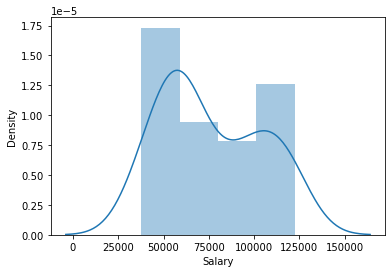

In [6]:
import seaborn as sns
sns.distplot(data['Salary'])

C:\Users\jayes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Exp', ylabel='Density'>

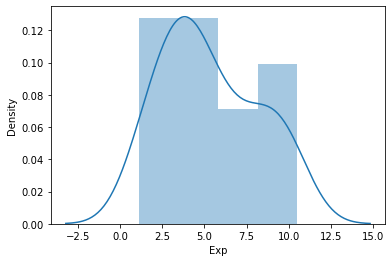

In [7]:
sns.distplot(data['Exp'])

In [8]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~Exp",data = data).fit()

In [9]:
model.params

Intercept    25792.200199
Exp           9449.962321
dtype: float64

In [10]:
print(model.tvalues,'\n',model.pvalues)

Intercept    11.346940
Exp          24.950094
dtype: float64 
 Intercept    5.511950e-12
Exp          1.143068e-20
dtype: float64


In [11]:
# R squared  values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [12]:
#Predict
newdata=pd.Series([5,8,7])

In [13]:
data_pred=pd.DataFrame(newdata,columns=['Exp'])
model.predict(data_pred)

0     73042.011806
1    101391.898770
2     91941.936449
dtype: float64

#Performing Log log transformation to check if model accuracy can be increased

In [14]:
import numpy as np
data['log_Salary']=np.log(data['Salary'])
data['log_Exp']=np.log(data['Exp'])

In [15]:
log_Model_log=smf.ols("log_Salary~log_Exp",data = data).fit()
log_Model_log.params

Intercept    10.328043
log_Exp       0.562089
dtype: float64

In [16]:
print(log_Model_log.tvalues,'\n',log_Model_log.pvalues)

Intercept    184.867959
log_Exp       16.352542
dtype: float64 
 Intercept    9.073132e-45
log_Exp      7.395278e-16
dtype: float64


In [17]:
(log_Model_log.rsquared,log_Model_log.rsquared_adj) 
## As far the r squared and adj r squared is most with  first Model without any transformation 

(0.9052150725817149, 0.9018298966024904)

In [18]:
##The best model for this data is first modelwithout any transformation with adj rsquared value of  0.9554194021486339